<a href="https://colab.research.google.com/github/guilherme-doamorim/projetos.datascience/blob/main/Amsterdam_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Sua Cidade*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade ________, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [2]:
# importar os pacotes que serão utilizados na análise
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2021-12-05/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dia
* `number_of_reviews_ltm` - número de reviews nos ultimos 12 meses
* `license` - número de registro


In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,60,3,285,2021-11-21,2.83,1,70,7,0363 5F3A 5684 6750 D14D
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,106,1,339,2020-03-27,3.53,2,0,0,0363 CBB3 2C10 0C2A 1E29
2,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,135,2,226,2021-10-20,2.11,1,8,7,0363 974D 4986 7411 88D8
3,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36775,4.89092,Private room,75,2,370,2021-11-25,4.63,2,238,34,0363 607B EA74 0BD8 2F6F
4,29051,Comfortable single room,124245,Edwin,NaN,Centrum-Oost,52.36584,4.89111,Private room,55,2,520,2021-11-26,5.57,2,267,41,0363 607B EA74 0BD8 2F6F


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [5]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]))

# tipos de variáveis
display(df.dtypes)

df.value_counts()

Entradas:	 5556
Variáveis:	 18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

Series([], dtype: int64)

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

* neighbourhood_group possui 100% dos seus valores nulos
* As variáveis reviews_per_month e last_review possuem menos de 10% de valores nulos. Ambas possuem o mesmo número de nulos, importante verificar se são nos mesmos imóveis.
* Variável license possue menos de 1% de valores nulos

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()).sort_values(ascending=False)



neighbourhood_group               5556
reviews_per_month                  512
last_review                        512
license                             40
minimum_nights                       0
number_of_reviews_ltm                0
availability_365                     0
calculated_host_listings_count       0
number_of_reviews                    0
id                                   0
name                                 0
room_type                            0
longitude                            0
latitude                             0
neighbourhood                        0
host_name                            0
host_id                              0
price                                0
dtype: int64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Plot de um histograma para distribuiçaõ e análise numérica das variáveis

## *Observação:* Podemos verificar que os gráficos estão sofrendo forte influência dos *Outliers*

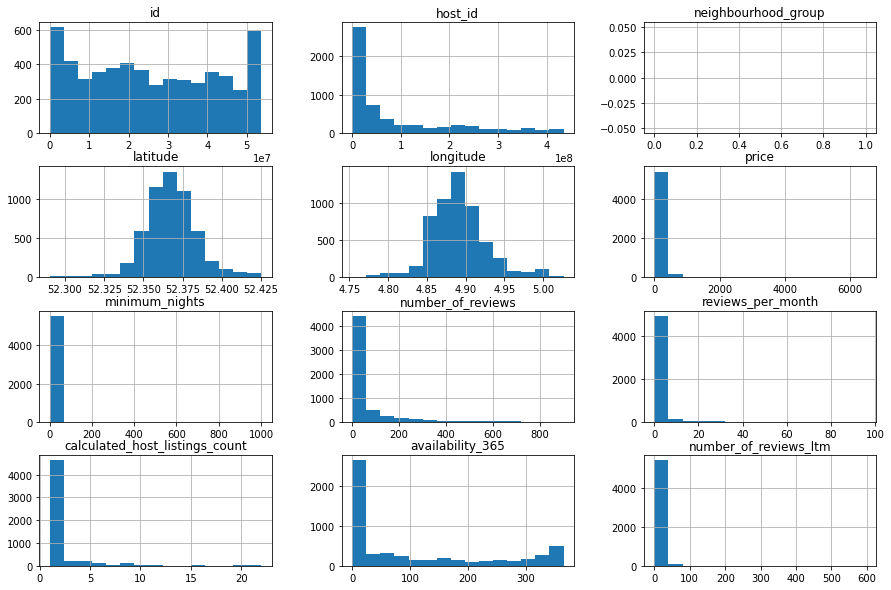

In [7]:
# histograma das variáveis numéricas

df.hist(bins=15, figsize=(15,10));

In [8]:
# Identificação dos Outliers
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,5556.000000,5556.000000,5556.000000,5044.000000,5556.000000,5556.000000
mean,168.184665,3.579014,48.966163,1.412659,2.181066,106.352772
std,167.458710,20.040285,89.079008,2.583281,3.158970,129.274364
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,98.000000,2.000000,4.000000,0.310000,1.000000,0.000000
50%,139.000000,2.000000,17.000000,0.670000,1.000000,34.000000
75%,200.000000,3.000000,47.000000,1.670000,2.000000,204.000000
max,6477.000000,1001.000000,901.000000,95.890000,22.000000,365.000000


Na variável *price* e *minimu_nights* temos outliers dos quais podem estar interferindo nos dados. 

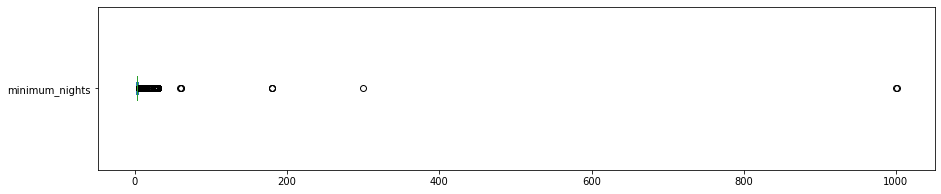

minimum_nights: valores acima de 30:
9 entradas
0.1620%


In [9]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

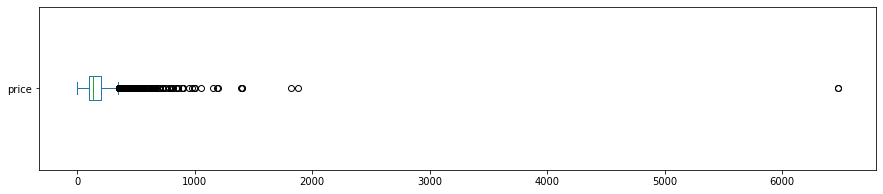


price: valores acima de 1500
4 entradas
0.0720%


In [12]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

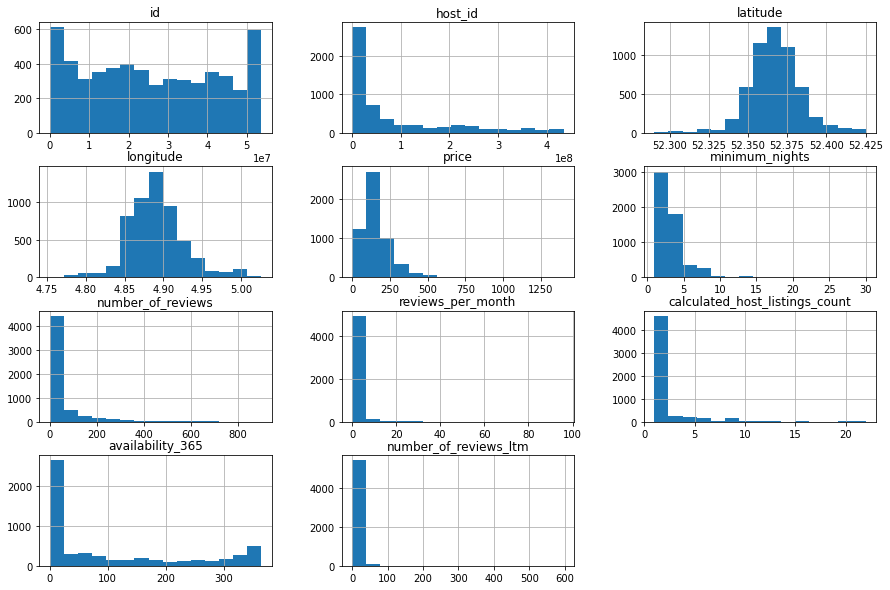

In [13]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [14]:
# ver a média da coluna `price`
df_clean.price.mean()

165.38661374706837

In [15]:
# média `price` por bairros
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Centrum-West                183.404157
Zuid                        182.654795
Centrum-Oost                182.572358
Oud-Noord                   180.258964
IJburg - Zeeburgereiland    180.183544
De Pijp - Rivierenbuurt     174.433757
Bijlmer-Centrum             169.454545
Watergraafsmeer             164.795918
Westerpark                  161.721622
De Baarsjes - Oud-West      161.494396
Name: price, dtype: float64

### **Q4. Qual a correlação existente entre as variáveis**

In [16]:
#  matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.020711,-0.190717,-0.143567,-0.072467,0.045610
minimum_nights,0.020711,1.000000,-0.118107,-0.133641,-0.087995,-0.095443
number_of_reviews,-0.190717,-0.118107,1.000000,0.505758,-0.035468,0.214297
reviews_per_month,-0.143567,-0.133641,0.505758,1.000000,0.107246,0.245759
calculated_host_listings_count,-0.072467,-0.087995,-0.035468,0.107246,1.000000,0.282124
availability_365,0.045610,-0.095443,0.214297,0.245759,0.282124,1.000000


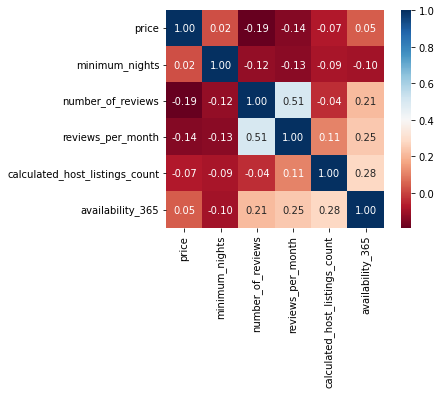

In [17]:
# heatmap de correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [18]:
#  quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    3696
Private room       1739
Hotel room           87
Shared room          21
Name: room_type, dtype: int64

In [19]:
# porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.666787
Private room       0.313729
Hotel room         0.015695
Shared room        0.003789
Name: room_type, dtype: float64

In [20]:
# Média de valores por tipo de quarto
df_clean.groupby(['room_type']).price.mean().sort_values(ascending=False)[:10]

room_type
Entire home/apt    192.426677
Hotel room         130.942529
Private room       110.383554
Shared room        103.809524
Name: price, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [21]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Centrum-West                183.404157
Zuid                        182.654795
Centrum-Oost                182.572358
Oud-Noord                   180.258964
IJburg - Zeeburgereiland    180.183544
De Pijp - Rivierenbuurt     174.433757
Bijlmer-Centrum             169.454545
Watergraafsmeer             164.795918
Westerpark                  161.721622
De Baarsjes - Oud-West      161.494396
Name: price, dtype: float64

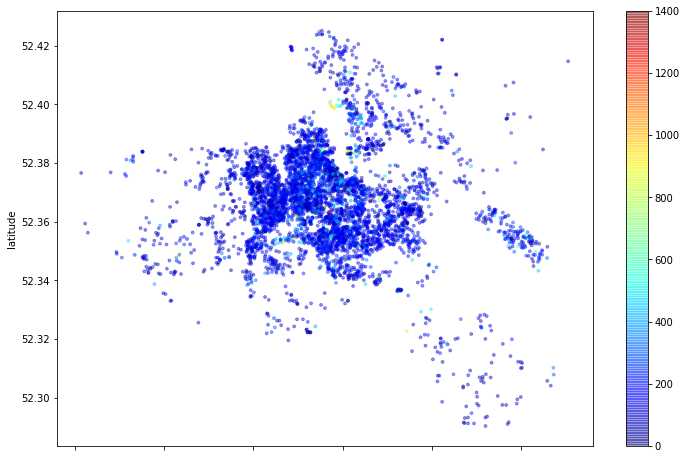

In [22]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

Se juntarmos as informações adquiridas em relação ao número de imóveis e aos bairros, entendemos onde estão as hospedagens mais baratas e qual a sua distância do centro.

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [23]:
# média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

3.041132960490709

## Conclusões




Podemos analisar que os `neighbourhood` nas areas centrais possuem o maior número de propriedades para locação. e também possuem as médias de valores mais altas. Tendo o `Centrun-West` com média de 183.40.

A média `minimu_nights`é de 3 noites

A propriedade com maior oferta é `Entire home/apto` com média `price` 192.42

Chegamos a conlcusão de Amsterdam assim como outras cidades turistícas possuem altos preços nas regiões mais centrais. E que provavelmente por conta disso temos uma média de 3 noites de estadia. Para viagens em grupo alugar uma casa ou apartamento inteiro se torna barato. Para os que viajam sozinhos um quarto é o que valeria mais a pena em questão de custo benefício.







